# Trabajo Práctico: Visualizando la oferta de Airbnb en la Ciudad de Buenos Aires

## Objetivo
El objetivo de este trabajo práctico es aplicar técnicas de análisis exploratorio y visualización 
de datos sobre un conjunto de datos real, utilizando buenas prácticas vistas en la materia. 
Los estudiantes deberán desarrollar habilidades para extraer, interpretar y comunicar 
información relevante a través de gráficos eficaces. 
## Consigna
Utilizando el dataset listings.csv de Airbnb Buenos Aires, deberán: 
1. Explorar y comprender el dataset. 
    - Analizar los atributos disponibles: tipos de datos, valores nulos, variables categóricas y numéricas, etc. 
2. Realizar un análisis exploratorio de datos (EDA) 
    - Detectar patrones generales, distribuciones, relaciones entre variables y outliers. 
3. Formular preguntas interesantes basadas en el dataset. 
4. Visualizar los datos. 
    - Crear visualizaciones estáticas o interactivas que respondan a las preguntas planteadas. 
    - Aplicar buenas prácticas en el diseño de gráficos: elección adecuada de tipos de gráficos, escalas, colores, títulos, leyendas, etc. 
5. Presentación oral en clase. 
    - Preparar una presentación (10-15 minutos) para exponer el trabajo realizado, las preguntas analizadas y las visualizaciones creadas. 
    - Deben justificar sus decisiones de análisis y visualización.

---

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
import folium
from folium.plugins import HeatMap
from IPython.display import display, Markdown
import matplotlib.cm as cm
import matplotlib.colors as colors
import altair as alt
import pandas as pd

plt.rcParams['figure.figsize'] = (12, 8)

## 1. Explorar y comprender el dataset
Analizar los atributos disponibles: tipos de datos, valores nulos, variables categóricas y numéricas, etc. 

In [113]:
listings_df = pd.read_csv('listings.csv')
reference_df = pd.read_csv('reference.csv')

print("Dataset 'listings_df.csv':\n")
print(f"Forma del dataset: {listings_df.shape}\n")
print(f"Columnas: {list(listings_df.columns)}\n")
print("Primeras 5 filas:")
listings_df.head()

Dataset 'listings_df.csv':

Forma del dataset: (35172, 18)

Columnas: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'license']

Primeras 5 filas:


id                                              name   host_id  \
0  11508                Amazing Luxurious Apt-Palermo Soho     42762   
1  14222      RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES  87710233   
2  15074                             ROOM WITH RIVER SIGHT     59338   
3  16695                         DUPLEX LOFT 2 - SAN TELMO     64880   
4  20062  PENTHOUSE /Terrace & pool /City views /2bedrooms     75891   

       host_name  neighbourhood_group neighbourhood   latitude  longitude  \
0        Candela                  NaN       Palermo -34.581840 -58.424150   
1          María                  NaN       Palermo -34.586170 -58.410360   
2         Monica                  NaN         Nuñez -34.538920 -58.465990   
3  Elbio Mariano                  NaN     Monserrat -34.614390 -58.376110   
4         Sergio                  NaN       Palermo -34.581848 -58.441605   

         room_type     price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt   67518.0               3                 44  2025-01-26   
1  Entire home/apt   22375.0               7                123  2025-01-18   
2     Private room       NaN              29                  0         NaN   
3  Entire home/apt   52511.0               2                 45  2019-11-30   
4  Entire home/apt  113360.0               2                330  2025-01-17   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.29                               1               300   
1               0.80                               6                44   
2                NaN                               1                 0   
3               0.27                               9               365   
4               1.84                               4               209   

   number_of_reviews_ltm license  
0                      5     NaN  
1                      8     NaN  
2                      0     NaN  
3                      0     NaN  
4                     25     NaN

In [114]:
print("Dataset 'reference.csv':\n")
print(f"Forma del dataset: {reference_df.shape}\n")
print(f"Columnas: {list(reference_df.columns)}\n")
print("Filas:")
reference_df

Dataset 'reference.csv':

Forma del dataset: (17, 4)

Columnas: ['Field', 'Type', 'Calculated', 'Description']

Filas:


Field      Type Calculated  \
0                               id   integer        NaN   
1                             name    string        NaN   
2                          host_id   integer        NaN   
3                        host_name    string        NaN   
4              neighbourhood_group      text          y   
5                    neighbourhood      text          y   
6                         latitude   numeric        NaN   
7                        longitude       NaN        NaN   
8                        room_type    string        NaN   
9                            price  currency        NaN   
10                  minimum_nights   integer        NaN   
11               number_of_reviews   integer        NaN   
12                     last_review      date          y   
13  calculated_host_listings_count   integer          y   
14                availability_365   integer          y   
15           number_of_reviews_ltm   integer          y   
16                         license    string        NaN   

                                          Description  
0          Airbnb's unique identifier for the listing  
1                                                 NaN  
2                                                 NaN  
3                                                 NaN  
4   The neighbourhood group as geocoded using the ...  
5   The neighbourhood as geocoded using the latitu...  
6   Uses the World Geodetic System (WGS84) project...  
7   Uses the World Geodetic System (WGS84) project...  
8                                                 NaN  
9   daily price in local currency. Note, $ sign ma...  
10  minimum number of night stay for the listing (...  
11              The number of reviews the listing has  
12                 The date of the last/newest review  
13  The number of listings the host has in the cur...  
14  avaliability_x. The availability of the listin...  
15  The number of reviews the listing has (in the ...  
16                                                NaN

In [115]:
print("Dimensiones del dataset")
print(f"{listings_df.shape[0]:,} filas y {listings_df.shape[1]} columnas")

print("\nInformación de tipos de datos\n")
listings_df.info()

print("\nEstadísticas descriptivas\n")
display(listings_df.describe())

Dimensiones del dataset
35,172 filas y 18 columnas

Información de tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35172 entries, 0 to 35171
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              35172 non-null  int64  
 1   name                            35172 non-null  object 
 2   host_id                         35172 non-null  int64  
 3   host_name                       35166 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   35172 non-null  object 
 6   latitude                        35172 non-null  float64
 7   longitude                       35172 non-null  float64
 8   room_type                       35172 non-null  object 
 9   price                           31598 non-null  float64
 10  minimum_nights                  35172 non-null  int64  
 11  number_of_

id       host_id  neighbourhood_group      latitude  \
count  3.517200e+04  3.517200e+04                  0.0  35172.000000   
mean   7.117880e+17  2.143294e+08                  NaN    -34.591554   
std    4.840974e+17  2.027420e+08                  NaN      0.018257   
min    1.150800e+04  1.342600e+04                  NaN    -34.693700   
25%    4.719776e+07  3.070016e+07                  NaN    -34.602670   
50%    8.875662e+17  1.421004e+08                  NaN    -34.590890   
75%    1.095206e+18  4.298024e+08                  NaN    -34.581047   
max    1.344330e+18  6.754917e+08                  NaN    -34.534980   

          longitude         price  minimum_nights  number_of_reviews  \
count  35172.000000  3.159800e+04    35172.000000       35172.000000   
mean     -58.417289  9.548776e+04        6.159871          28.027579   
std        0.030169  1.402656e+06       26.072002          45.151666   
min      -58.530890  2.600000e+02        1.000000           0.000000   
25%      -58.437050  2.971100e+04        1.000000           2.000000   
50%      -58.418914  3.990800e+04        2.000000          11.000000   
75%      -58.392114  5.776200e+04        4.000000          36.000000   
max      -58.355403  1.050217e+08     1000.000000         992.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       29412.000000                    35172.000000      35172.000000   
mean            1.325920                       15.646878        206.609320   
std             1.336446                       34.108688        126.189102   
min             0.010000                        1.000000          0.000000   
25%             0.360000                        1.000000         88.000000   
50%             0.930000                        2.000000        231.000000   
75%             1.910000                       12.000000        333.000000   
max            26.080000                      222.000000        365.000000   

       number_of_reviews_ltm  
count           35172.000000  
mean                9.500625  
std                13.991379  
min                 0.000000  
25%                 0.000000  
50%                 4.000000  
75%                13.000000  
max               340.000000

#### Análisis de Variables Numéricas y Categóricas

A su vez las variables numéricas y categóricas se las clasifica según las escalas de medición planteadas por S.S. Stevens:

| Nº  | Variable                          | Tipo de Variable        | Subtipo                |
|-----|-----------------------------------|--------------------------|-------------------------|
| 0   | id                                | Numérica                 | Discreta                |
| 1   | name                              | Categórica               | Nominal                 |
| 2   | host_id                           | Numérica                 | Discreta                |
| 3   | host_name                         | Categórica               | Nominal                 |
| 4   | neighbourhood_group               | Categórica               | Nominal                 |
| 5   | neighbourhood                     | Categórica               | Nominal                 |
| 6   | latitude                          | Numérica                 | Continua                |
| 7   | longitude                         | Numérica                 | Continua                |
| 8   | room_type                         | Categórica               | Nominal                 |
| 9   | price                             | Numérica                 | Continua                |
| 10  | minimum_nights                    | Numérica                 | Discreta                |
| 11  | number_of_reviews                 | Numérica                 | Discreta                |
| 12  | last_review                       | Categórica               | Nominal                 |
| 13  | reviews_per_month                 | Numérica                 | Continua                |
| 14  | calculated_host_listings_count    | Numérica                 | Discreta                |
| 15  | availability_365                  | Numérica                 | Discreta                |
| 16  | number_of_reviews_ltm             | Numérica                 | Discreta                |
| 17  | license                           | Categórica               | Nominal                 |


In [116]:
print("Descripción de las columnas:")
column_descriptions = dict(zip(reference_df['Field'], reference_df['Description']))
for col in listings_df.columns:
    if col in column_descriptions:
        print(f"• {col}: {column_descriptions[col]}")
    else:
        print(f"• {col}: (No hay descripción disponible)")

Descripción de las columnas:
• id: Airbnb's unique identifier for the listing
• name: nan
• host_id: nan
• host_name: nan
• neighbourhood_group: The neighbourhood group as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
• neighbourhood: The neighbourhood as geocoded using the latitude and longitude against neighborhoods as defined by open or public digital shapefiles.
• latitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.
• longitude: Uses the World Geodetic System (WGS84) projection for latitude and longitude.
• room_type: nan
• price: daily price in local currency. Note, $ sign may be used despite locale
• minimum_nights: minimum number of night stay for the listing (calendar rules may be different)
• number_of_reviews: The number of reviews the listing has
• last_review: The date of the last/newest review
• reviews_per_month: (No hay descripción disponible)
• calculated_host_listings_

Análisis de la cantidad valores nulos por columna:


Columna  Valores_Nulos  Porcentaje_Nulos
neighbourhood_group  neighbourhood_group          35172        100.000000
license                          license          34782         98.891163
reviews_per_month      reviews_per_month           5760         16.376663
last_review                  last_review           5760         16.376663
price                              price           3574         10.161492
host_name                      host_name              6          0.017059

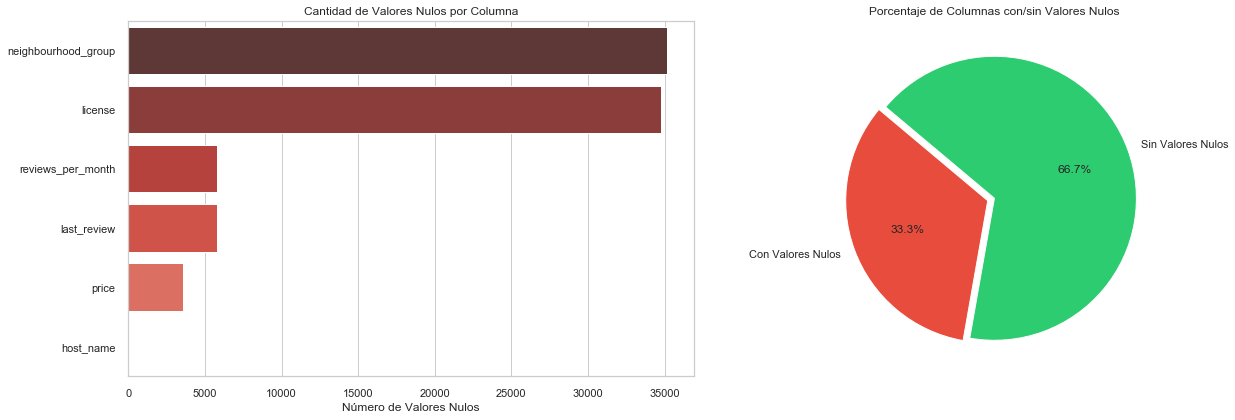

In [117]:
print("Análisis de la cantidad valores nulos por columna:")

# Análisis de valores nulos por columna
null_analysis = pd.DataFrame({
    'Columna': listings_df.columns,
    'Valores_Nulos': listings_df.isnull().sum(),
    'Porcentaje_Nulos': (listings_df.isnull().sum() / len(listings_df)) * 100
}).sort_values('Porcentaje_Nulos', ascending=False)

# Mostrar tabla con columnas que tienen valores nulos
display(null_analysis[null_analysis['Valores_Nulos'] > 0])

# Preparar datos para gráficos
null_counts = listings_df.isnull().sum()
null_counts = null_counts[null_counts > 0].sort_values(ascending=False)

total_columns = listings_df.shape[1]
columns_with_nulls = (listings_df.isnull().sum() > 0).sum()
columns_without_nulls = total_columns - columns_with_nulls

# Crear figura con dos subplots horizontales
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Gráfico de barras
sns.barplot(
    x=null_counts.values.tolist(),
    y=null_counts.index.tolist(),
    ax=axes[0],
    palette="Reds_d"
)
axes[0].set_title('Cantidad de Valores Nulos por Columna')
axes[0].set_xlabel('Número de Valores Nulos')

# Gráfico de torta
axes[1].pie(
    [columns_with_nulls, columns_without_nulls],
    labels=['Con Valores Nulos', 'Sin Valores Nulos'],
    autopct='%1.1f%%',
    colors=['#e74c3c', '#2ecc71'],
    startangle=140,
    explode=(0.05, 0)
)
axes[1].set_title('Porcentaje de Columnas con/sin Valores Nulos')

plt.tight_layout()
plt.show()

## 2.  Realizar un análisis exploratorio de datos (EDA)
Detectar patrones generales, distribuciones, relaciones entre variables y outliers.

In [118]:
duplicates = listings_df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicates}")

print("\nCambio de formato para columna: 'last_review' de object a datetime\n")
df_clean = listings_df.copy()
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], errors='coerce')

print(df_clean.dtypes)


Número de filas duplicadas: 0

Cambio de formato para columna: 'last_review' de object a datetime

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                      float64
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object


Análisis de variables numéricas

Variables numéricas: ['id', 'host_id', 'neighbourhood_group', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

Estadísticas Descriptivas:


id       host_id  neighbourhood_group      latitude  \
count  3.517200e+04  3.517200e+04                  0.0  35172.000000   
mean   7.117880e+17  2.143294e+08                  NaN    -34.591554   
std    4.840974e+17  2.027420e+08                  NaN      0.018257   
min    1.150800e+04  1.342600e+04                  NaN    -34.693700   
25%    4.719776e+07  3.070016e+07                  NaN    -34.602670   
50%    8.875662e+17  1.421004e+08                  NaN    -34.590890   
75%    1.095206e+18  4.298024e+08                  NaN    -34.581047   
max    1.344330e+18  6.754917e+08                  NaN    -34.534980   

          longitude         price  minimum_nights  number_of_reviews  \
count  35172.000000  3.159800e+04    35172.000000       35172.000000   
mean     -58.417289  9.548776e+04        6.159871          28.027579   
std        0.030169  1.402656e+06       26.072002          45.151666   
min      -58.530890  2.600000e+02        1.000000           0.000000   
25%      -58.437050  2.971100e+04        1.000000           2.000000   
50%      -58.418914  3.990800e+04        2.000000          11.000000   
75%      -58.392114  5.776200e+04        4.000000          36.000000   
max      -58.355403  1.050217e+08     1000.000000         992.000000   

       reviews_per_month  calculated_host_listings_count  availability_365  \
count       29412.000000                    35172.000000      35172.000000   
mean            1.325920                       15.646878        206.609320   
std             1.336446                       34.108688        126.189102   
min             0.010000                        1.000000          0.000000   
25%             0.360000                        1.000000         88.000000   
50%             0.930000                        2.000000        231.000000   
75%             1.910000                       12.000000        333.000000   
max            26.080000                      222.000000        365.000000   

       number_of_reviews_ltm  
count           35172.000000  
mean                9.500625  
std                13.991379  
min                 0.000000  
25%                 0.000000  
50%                 4.000000  
75%                13.000000  
max               340.000000


Matriz de Correlación entre Variables Numéricas:


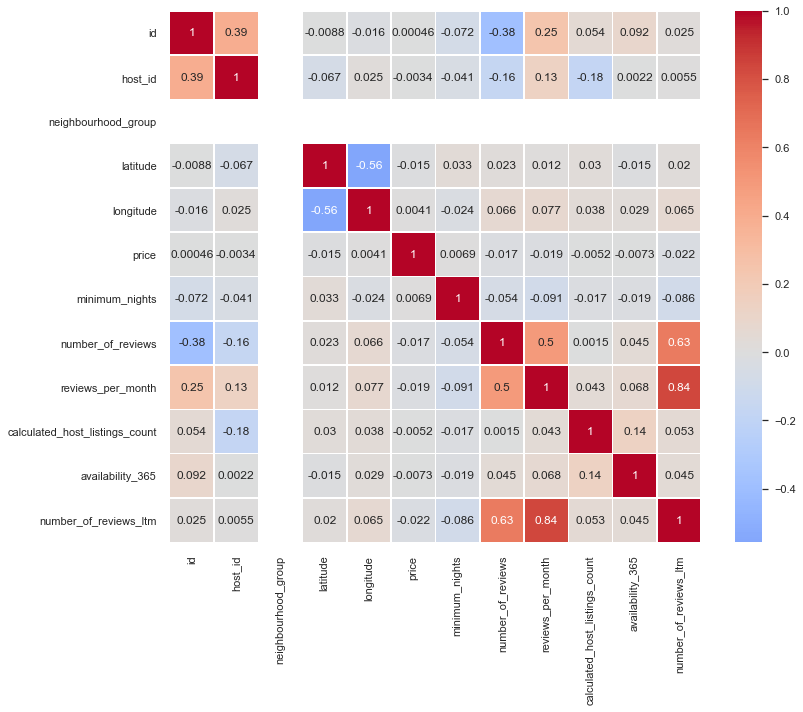

In [119]:
# Análisis de variables numéricas
print("Análisis de variables numéricas\n")

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
print(f"Variables numéricas: {list(numeric_cols)}")

# Estadísticas descriptivas
print("\nEstadísticas Descriptivas:")
display(df_clean[numeric_cols].describe())

numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
corr_data = df_clean[numeric_cols].corr()

print("\nMatriz de Correlación entre Variables Numéricas:")
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', center=0, 
           square=True, linewidths=0.5)
plt.tight_layout()
plt.show()

price_corr = corr_data['price'].abs().sort_values(ascending=False)

Análisis de Precios:

Precio promedio: $95,487.76
Precio mediano: $39,908.00
Precio mínimo: $260.00
Precio máximo: $105,021,704.00
Desviación estándar: $1,402,656.42


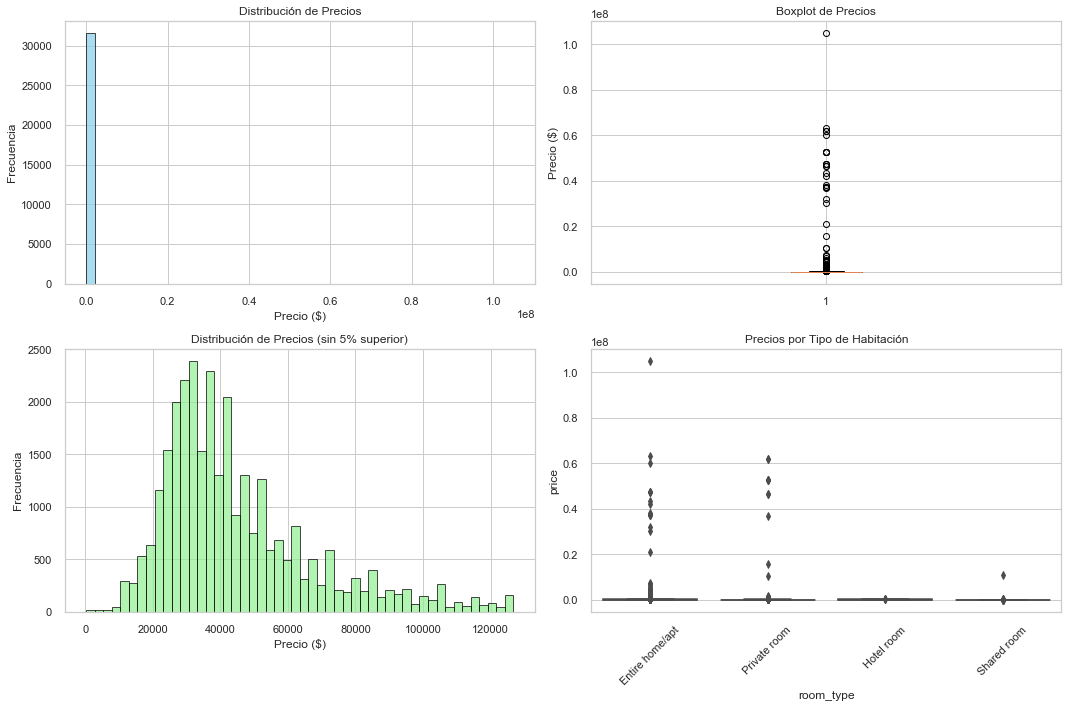

In [120]:
print("Análisis de Precios:\n")

# Filtrar precios válidos (no nulos y mayores a 0)
valid_prices = df_clean['price'].dropna()
valid_prices = valid_prices[valid_prices > 0]

print(f"Precio promedio: ${valid_prices.mean():,.2f}")
print(f"Precio mediano: ${valid_prices.median():,.2f}")
print(f"Precio mínimo: ${valid_prices.min():,.2f}")
print(f"Precio máximo: ${valid_prices.max():,.2f}")
print(f"Desviación estándar: ${valid_prices.std():,.2f}")

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.hist(valid_prices.values, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribución de Precios')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')


plt.subplot(2, 2, 2)
plt.boxplot(valid_prices.values)
plt.title('Boxplot de Precios')
plt.ylabel('Precio ($)')


plt.subplot(2, 2, 3)
q95 = valid_prices.quantile(0.95)
filtered_prices = valid_prices[valid_prices <= q95]
plt.hist(filtered_prices.values, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Distribución de Precios (sin 5% superior)')
plt.xlabel('Precio ($)')
plt.ylabel('Frecuencia')


plt.subplot(2, 2, 4)
if 'room_type' in df_clean.columns:
    df_price_room = df_clean[df_clean['price'].notna() & (df_clean['price'] > 0)]
    sns.boxplot(data=df_price_room, x='room_type', y='price')
    plt.title('Precios por Tipo de Habitación')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Análisis de Outliers:

PRICE:
  Rango normal: -12365.50 - 99838.50
  Outliers detectados: 2693 (8.5%)
  Valores extremos: 260.00 - 105021704.00

MINIMUM_NIGHTS:
  Rango normal: -3.50 - 8.50
  Outliers detectados: 2950 (8.4%)
  Valores extremos: 1.00 - 1000.00

NUMBER_OF_REVIEWS:
  Rango normal: -49.00 - 87.00
  Outliers detectados: 2709 (7.7%)
  Valores extremos: 0.00 - 992.00

AVAILABILITY_365:
  Rango normal: -279.50 - 700.50
  Outliers detectados: 0 (0.0%)


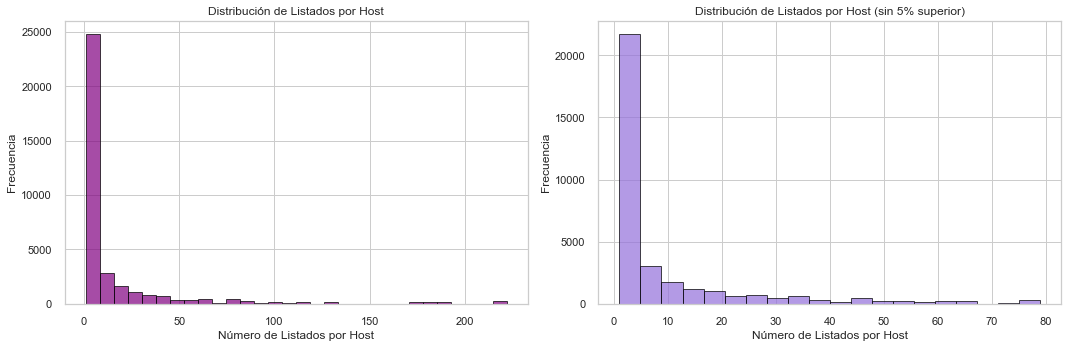

In [121]:
print("Análisis de Outliers:")

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound


key_numeric_cols = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
key_numeric_cols = [col for col in key_numeric_cols if col in df_clean.columns]

for col in key_numeric_cols:
    if df_clean[col].notna().any():
        clean_data = df_clean.dropna(subset=[col])
        if col == 'price':
            clean_data = clean_data[clean_data[col] > 0]  # Filtrar precios válidos
        
        outliers, lower, upper = detect_outliers_iqr(clean_data, col)
        
        print(f"\n{col.upper()}:")
        print(f"  Rango normal: {lower:.2f} - {upper:.2f}")
        print(f"  Outliers detectados: {len(outliers)} ({len(outliers)/len(clean_data)*100:.1f}%)")
        
        if len(outliers) > 0:
            print(f"  Valores extremos: {clean_data[col].min():.2f} - {clean_data[col].max():.2f}")
            
            
   
host_data = df_clean['calculated_host_listings_count'].dropna()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

plt.hist(host_data.values, bins=30, alpha=0.7, color='purple', edgecolor='black')
plt.title('Distribución de Listados por Host')
plt.xlabel('Número de Listados por Host')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)

filtered_host_data = host_data[host_data <= host_data.quantile(0.95)]

plt.hist(filtered_host_data.values, bins=20, alpha=0.7, color='mediumpurple', edgecolor='black')
plt.title('Distribución de Listados por Host (sin 5% superior)')
plt.xlabel('Número de Listados por Host')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Top 10 Hosts con Más Departamentos en Alquiler:



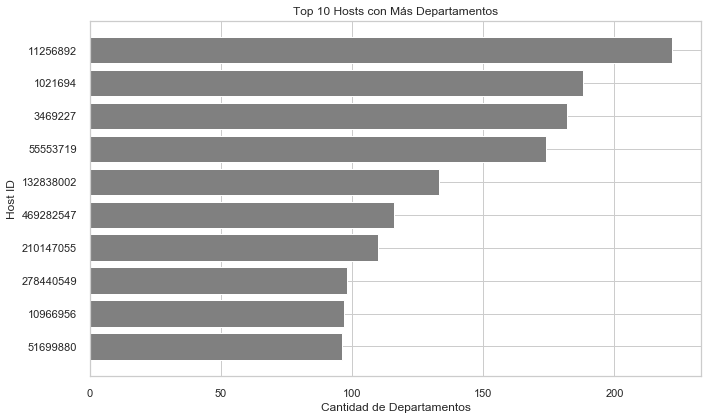

In [122]:
print("Top 10 Hosts con Más Departamentos en Alquiler:\n")
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

top_hosts = df_clean['host_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_hosts.index.astype(str), top_hosts.values, color='gray')
plt.xlabel("Cantidad de Departamentos")
plt.ylabel("Host ID")
plt.title("Top 10 Hosts con Más Departamentos")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Distribución de Tipos de Habitación:



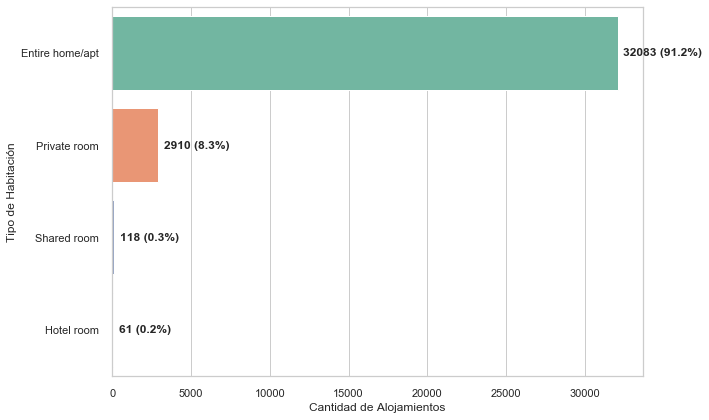

In [123]:
print("Distribución de Tipos de Habitación:\n")
room_counts = df_clean['room_type'].value_counts()
total = room_counts.sum()
percentages = (room_counts / total * 100).round(1)
plt.figure(figsize=(10, 6))
sns.barplot(x=room_counts.values, y=room_counts.index, palette='Set2')

for i, (count, pct) in enumerate(zip(room_counts.values, percentages.values)):
    label = f"{count} ({pct}%)"
    plt.text(count + total * 0.01, i, label, va='center', fontweight='bold')

plt.xlabel('Cantidad de Alojamientos')
plt.ylabel('Tipo de Habitación')
plt.tight_layout()
plt.show()

Total de barrios únicos: 48

Top 15 barrios con más alojamientos:



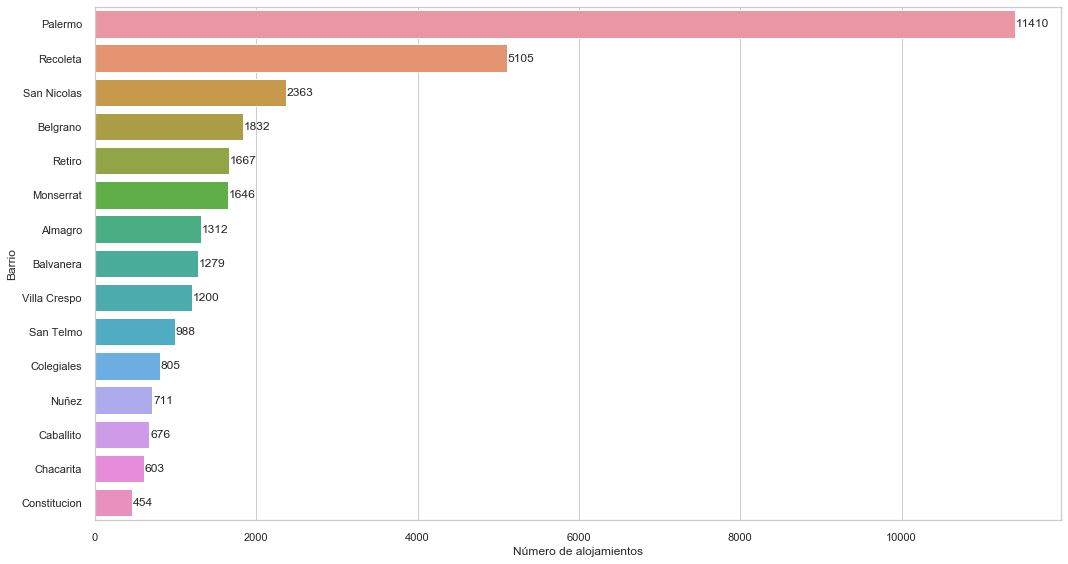

In [124]:
print(f"Total de barrios únicos: {df_clean['neighbourhood'].nunique()}\n")

top_neighbourhoods = df_clean['neighbourhood'].value_counts().head(15)

print("Top 15 barrios con más alojamientos:\n")
plt.figure(figsize=(15, 8))

sns.barplot(x=top_neighbourhoods.values, y=top_neighbourhoods.index.tolist())
plt.xlabel('Número de alojamientos')
plt.ylabel('Barrio')


for i, v in enumerate(top_neighbourhoods.values):
    plt.text(v + 10, i, str(v), va='center')

plt.tight_layout()
plt.show()

Análisis de Reseñas

Promedio de reseñas por alojamiento: 28.03
Mediana de reseñas: 11.00
Alojamientos sin reseñas: 5760 (16.4%)


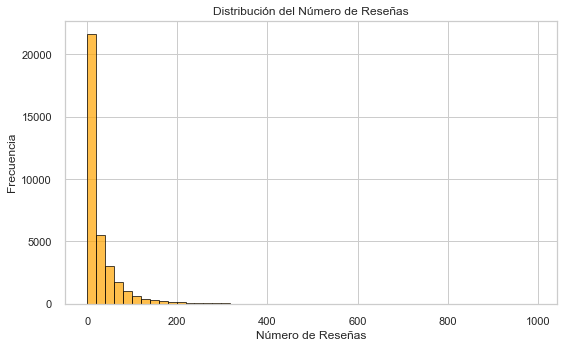

In [125]:
print("Análisis de Reseñas\n")

reviews_data = df_clean['number_of_reviews'].dropna()

print(f"Promedio de reseñas por alojamiento: {reviews_data.mean():.2f}")
print(f"Mediana de reseñas: {reviews_data.median():.2f}")
print(f"Alojamientos sin reseñas: {(reviews_data == 0).sum()} ({(reviews_data == 0).mean()*100:.1f}%)")

plt.figure(figsize=(15, 5))


plt.subplot(1, 2, 1)

plt.hist(reviews_data.values, bins=50, alpha=0.7, color='orange', edgecolor='black')
plt.title('Distribución del Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

In [126]:
print("Análisis Geográfico\n")

geo_data = df_clean.dropna(subset=['latitude', 'longitude'])

print(f"Rango de latitud: {geo_data['latitude'].min():.4f} a {geo_data['latitude'].max():.4f}")
print(f"Rango de longitud: {geo_data['longitude'].min():.4f} a {geo_data['longitude'].max():.4f}")

geo_price_data = geo_data.dropna(subset=['price'])
geo_price_data = geo_price_data[geo_price_data['price'] > 0]


p5 = geo_price_data['price'].quantile(0.05)
p95 = geo_price_data['price'].quantile(0.95)
geo_price_data = geo_price_data[(geo_price_data['price'] >= p5) & (geo_price_data['price'] <= p95)]


center_lat = geo_price_data['latitude'].mean()
center_lon = geo_price_data['longitude'].mean()

mapa = folium.Map(
    location=[center_lat, center_lon], 
    zoom_start=12,
    tiles='CartoDB positron'
)


precios_norm = (geo_price_data['price'] - geo_price_data['price'].min()) / (geo_price_data['price'].max() - geo_price_data['price'].min())

# Crear lista de puntos [lat, lon, intensidad]
heat_data = []
for idx, row in geo_price_data.iterrows():
    # Usar precio normalizado como intensidad
    intensidad = precios_norm[idx]
    heat_data.append([row['latitude'], row['longitude'], intensidad])

# Agregar mapa de calor
HeatMap(
    heat_data,
    min_opacity=0.3,        # Opacidad mínima aumentada para mejor visibilidad
    max_zoom=18,           # Zoom máximo
    radius=20,             # Radio de influencia aumentado
    blur=15,               # Efecto de difuminado aumentado
    gradient={             # Gradiente de colores mejorado
        0.0: 'darkblue',   # Precios más bajos (P5)
        0.2: 'blue',       
        0.4: 'cyan',
        0.6: 'lime',
        0.8: 'yellow',
        0.9: 'orange',
        1.0: 'red'         # Precios más altos (P95)
    }
).add_to(mapa)

legend_html = '''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 240px; height: 180px; 
     background-color: white; border:3px solid #333; z-index:9999; 
     font-size:14px; padding: 15px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.3);">
<p style="margin: 0 0 10px 0; font-weight: bold; font-size: 16px;">🔥 Mapa de Calor - Precios</p>
<p style="margin: 0 0 8px 0; font-size: 12px; color: #666;">Filtrado entre P5 - P95</p>
<div style="background: linear-gradient(to right, darkblue, blue, cyan, lime, yellow, orange, red); height: 20px; width: 100%; margin: 10px 0; border-radius: 5px;"></div>
<div style="display: flex; justify-content: space-between; font-size: 11px; margin-bottom: 8px;">
    <span>Bajo</span>
    <span>Medio</span>
    <span>Alto</span>
</div>
<p style="margin: 5px 0; font-size: 12px;">
    <b>Propiedades:</b> ''' + str(len(geo_price_data)) + '''
</p>
</div>
'''

mapa.get_root().html.add_child(folium.Element(legend_html))


display(mapa)


Análisis Geográfico

Rango de latitud: -34.6937 a -34.5350
Rango de longitud: -58.5309 a -58.3554


In [127]:

geo_price_data = df_clean.dropna(subset=['latitude', 'longitude', 'price'])
geo_price_data = geo_price_data[geo_price_data['price'] > 0]

p95 = geo_price_data['price'].quantile(0.95)
p05 = geo_price_data['price'].quantile(0.05)
geo_price_data = geo_price_data[(geo_price_data['price'] <= p95) & (geo_price_data['price'] >= p05)]

center_lat = geo_price_data['latitude'].mean()
center_lon = geo_price_data['longitude'].mean()

mapa = folium.Map(location=[center_lat, center_lon], zoom_start=12, tiles='CartoDB positron')

norm = colors.Normalize(vmin=geo_price_data['price'].min(), vmax=geo_price_data['price'].max())
cmap = cm.get_cmap('YlOrRd')

sample_data = geo_price_data.sample(min(500, len(geo_price_data)))

def generar_tooltip(row):
    return (
        f"<div style='min-width: 220px;'>"
        f"<b>Nombre:</b> <span style='font-weight:bold'>{row['name']}</span><br>"
        f"<b>Precio:</b> <span style='font-weight:bold'>${row['price']:,.0f}</span><br>"
        f"<b>Barrio:</b> <span style='font-weight:bold'>{row['neighbourhood']}</span><br>"
        f"<b>Tipo:</b> <span style='font-weight:bold'>{row['room_type']}</span>"
        f"</div>"
    )

for _, row in sample_data.iterrows():
    color = colors.to_hex(cmap(norm(row['price'])))
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fillColor=color,
        fill_opacity=0.8,
        tooltip=folium.Tooltip(generar_tooltip(row), sticky=True, direction='top')
    ).add_to(mapa)

# Marcador de precio mínimo
min_row = geo_price_data.loc[geo_price_data['price'].idxmin()]
folium.Marker(
    location=[min_row['latitude'], min_row['longitude']],
    icon=folium.Icon(color='green', icon='arrow-down', prefix='fa'),
    tooltip=folium.Tooltip(generar_tooltip(min_row), sticky=True, direction='top')
).add_to(mapa)

# Marcador de precio máximo
max_row = geo_price_data.loc[geo_price_data['price'].idxmax()]
folium.Marker(
    location=[max_row['latitude'], max_row['longitude']],
    icon=folium.Icon(color='red', icon='arrow-up', prefix='fa'),
    tooltip=folium.Tooltip(generar_tooltip(max_row), sticky=True, direction='top')
).add_to(mapa)

min_price = int(geo_price_data['price'].min())
max_price = int(geo_price_data['price'].max())

legend_html = f'''
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 240px; height: 130px; 
     background-color: white; border:3px solid #333; z-index:9999; 
     font-size:14px; padding: 10px 15px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0,0,0,0.3);">
<p style="margin: 0 0 8px 0; font-weight: bold; font-size: 15px;">💰 Escala de Precios por Noche</p>
<p style="margin: 0 0 8px 0; font-size: 12px; color: #666;">Filtrado entre P5 - P95</p>
<div style="display: flex; align-items: center;">
    <span style="flex: 1; text-align: left;">${min_price:,.0f}</span>
    <div style="flex: 6; height: 15px; background: linear-gradient(to right, #ffffcc, #ffeda0, #feb24c, #f03b20); margin: 0 10px;"></div>
    <span style="flex: 1; text-align: right;">${max_price:,.0f}</span>
</div>
</div>
'''
mapa.get_root().html.add_child(folium.Element(legend_html))

display(mapa)


## 3. Formular preguntas interesantes basadas en el dataset. 

Las preguntas que surgen del análisis exploratorio son:
1. Cuáles son los barrios más caros y más baratos?
2. Existe relación entre el número de reseñas y el precio?
3. Cuál es la relación entre disponibilidad y precio?

### 1. Cuáles son los barrios más caros y más baratos?

In [132]:
price_neighbourhood = df_clean.dropna(subset=['price', 'neighbourhood'])
price_neighbourhood = price_neighbourhood[price_neighbourhood['price'] > 0]


p5 = price_neighbourhood['price'].quantile(0.05)
p95 = price_neighbourhood['price'].quantile(0.95)
print(f" Filtrado de precios por barrio:")
print(f"Percentil 5 (mínimo): ${p5:.2f}")
print(f"Percentil 95 (máximo): ${p95:.2f}")
print(f"Propiedades antes del filtro: {len(price_neighbourhood):,}")
price_neighbourhood = price_neighbourhood[(price_neighbourhood['price'] >= p5) & (price_neighbourhood['price'] <= p95)]
print(f"Propiedades después del filtro: {len(price_neighbourhood):,}")

neighbourhood_stats = price_neighbourhood.groupby('neighbourhood').agg({
    'price': ['mean', 'median', 'count']
}).round(2)

neighbourhood_stats.columns = ['precio_promedio', 'precio_mediano', 'cantidad_listados']
neighbourhood_stats = neighbourhood_stats[neighbourhood_stats['cantidad_listados'] >= 5]
neighbourhood_stats = neighbourhood_stats.sort_values('precio_promedio', ascending=False)

print("\nTOP 10 BARRIOS MÁS CAROS (P5-P95):")
print(neighbourhood_stats.head(10))

print("\nTOP 10 BARRIOS MÁS BARATOS (P5-P95):")
print(neighbourhood_stats.tail(10))


print(f"\n ESTADÍSTICAS GENERALES (P5-P95):")
print(f"Barrios analizados: {len(neighbourhood_stats)}")
print(f"Precio promedio general: ${price_neighbourhood['price'].mean():.2f}")
print(f"Precio mediano general: ${price_neighbourhood['price'].median():.2f}")
print(f"Rango de precios: ${p5:.2f} - ${p95:.2f}")

 Filtrado de precios por barrio:
Percentil 5 (mínimo): $19950.25
Percentil 95 (máximo): $126786.10
Propiedades antes del filtro: 31,598
Propiedades después del filtro: 28,438

TOP 10 BARRIOS MÁS CAROS (P5-P95):
                 precio_promedio  precio_mediano  cantidad_listados
neighbourhood                                                      
Puerto Madero           85735.71         86044.5                244
Colegiales              50135.78         42009.0                639
Palermo                 50003.62         42775.0               9515
Recoleta                48438.58         42009.0               4192
Nuñez                   48241.84         41615.0                600
Belgrano                47386.56         42009.0               1487
Retiro                  47053.62         39761.0               1396
Barracas                46651.39         42009.0                201
Villa Devoto            45521.31         39908.0                 85
Velez Sarsfield         45320.31         

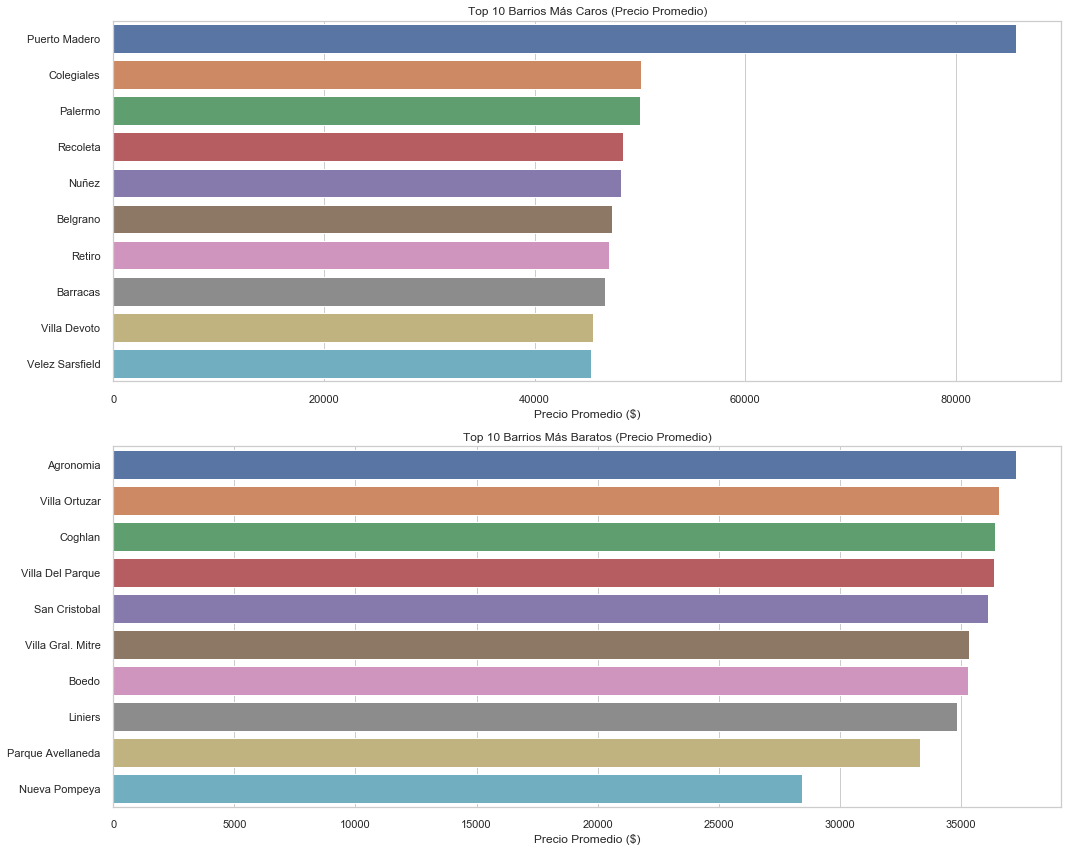

In [129]:

plt.figure(figsize=(15, 12))


plt.subplot(2, 1, 1)
top_expensive = neighbourhood_stats.head(10)

sns.barplot(x=top_expensive['precio_promedio'].values, y=top_expensive.index.tolist())
plt.title('Top 10 Barrios Más Caros (Precio Promedio)')
plt.xlabel('Precio Promedio ($)')


plt.subplot(2, 1, 2)
top_cheap = neighbourhood_stats.tail(10)

sns.barplot(x=top_cheap['precio_promedio'].values, y=top_cheap.index.tolist())
plt.title('Top 10 Barrios Más Baratos (Precio Promedio)')
plt.xlabel('Precio Promedio ($)')

plt.tight_layout()
plt.show()

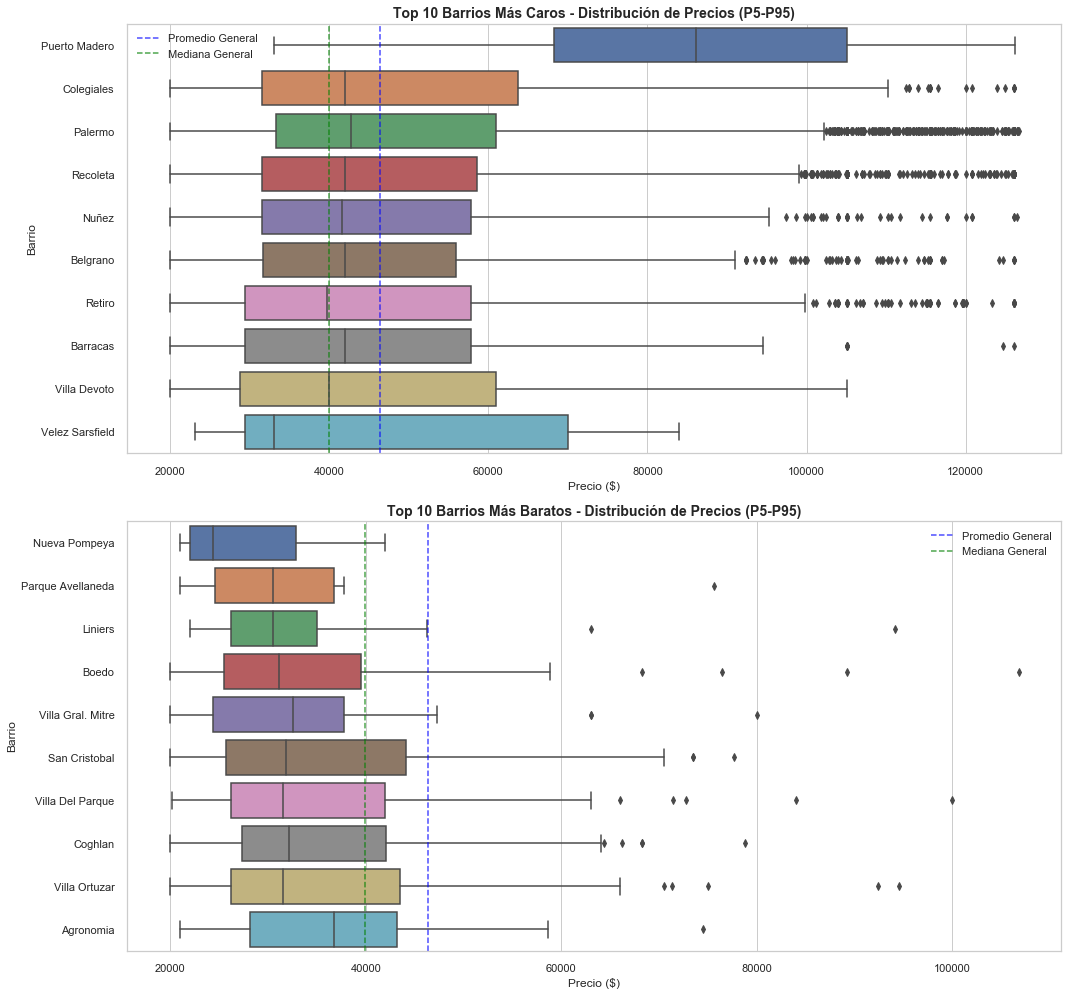

In [130]:

plt.figure(figsize=(15, 14))


plt.subplot(2, 1, 1)
top_expensive_names = neighbourhood_stats.head(10).index.tolist()
top_expensive_data = price_neighbourhood[price_neighbourhood['neighbourhood'].isin(top_expensive_names)]

order_expensive = neighbourhood_stats.head(10).index.tolist()
sns.boxplot(data=top_expensive_data, x='price', y='neighbourhood', 
           order=order_expensive, orient='h')
plt.title('Top 10 Barrios Más Caros - Distribución de Precios (P5-P95)', fontsize=14, fontweight='bold')
plt.xlabel('Precio ($)')
plt.ylabel('Barrio')


plt.axvline(price_neighbourhood['price'].mean(), color='blue', linestyle='--', alpha=0.7, label='Promedio General')
plt.axvline(price_neighbourhood['price'].median(), color='green', linestyle='--', alpha=0.7, label='Mediana General')
plt.legend()


plt.subplot(2, 1, 2)
top_cheap_names = neighbourhood_stats.tail(10).index.tolist()
top_cheap_data = price_neighbourhood[price_neighbourhood['neighbourhood'].isin(top_cheap_names)]


order_cheap = neighbourhood_stats.tail(10).sort_values('precio_promedio', ascending=True).index.tolist()
sns.boxplot(data=top_cheap_data, x='price', y='neighbourhood', 
           order=order_cheap, orient='h')
plt.title('Top 10 Barrios Más Baratos - Distribución de Precios (P5-P95)', fontsize=14, fontweight='bold')
plt.xlabel('Precio ($)')
plt.ylabel('Barrio')


plt.axvline(price_neighbourhood['price'].mean(), color='blue', linestyle='--', alpha=0.7, label='Promedio General')
plt.axvline(price_neighbourhood['price'].median(), color='green', linestyle='--', alpha=0.7, label='Mediana General')
plt.legend()

plt.tight_layout()
plt.show()

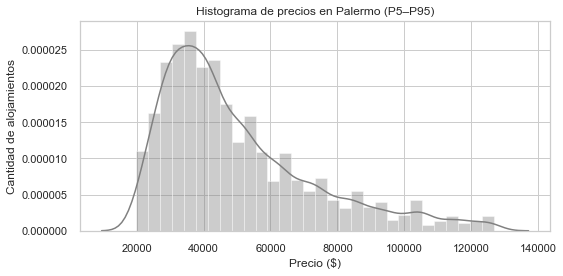

In [134]:
plt.figure(figsize=(8, 4))
sns.distplot(palermo_filtered['price'], bins=30, kde=True, color='gray')
plt.title('Histograma de precios en Palermo (P5–P95)')
plt.xlabel('Precio ($)')
plt.ylabel('Cantidad de alojamientos')
plt.tight_layout()
plt.show()


2. Existe relación entre el número de reseñas y el precio?

In [135]:

review_price = df_clean.dropna(subset=['price', 'number_of_reviews'])
review_price = review_price[review_price['price'] > 0]

correlation = review_price['price'].corr(review_price['number_of_reviews'])

review_price['review_category'] = pd.cut(
    review_price['number_of_reviews'], 
    bins=[-1, 0, 10, 50, 100, float('inf')],  # Cambiado: -1 en lugar del primer 0
    labels=['Sin reseñas', '1-10 reseñas', '11-50 reseñas', '51-100 reseñas', '100+ reseñas']
)

price_by_reviews = review_price.groupby('review_category')['price'].agg(['mean', 'median', 'count'])
print("\n Precio promedio por categoría de reseñas:")
print(price_by_reviews)


 Precio promedio por categoría de reseñas:
                          mean   median  count
review_category                               
Sin reseñas      240021.189201  42009.0   4445
1-10 reseñas      87150.466342  40958.0  10280
11-50 reseñas     66266.299070  38259.0  10964
51-100 reseñas    56617.685471  38967.5   3882
100+ reseñas      53324.053774  39310.0   2027


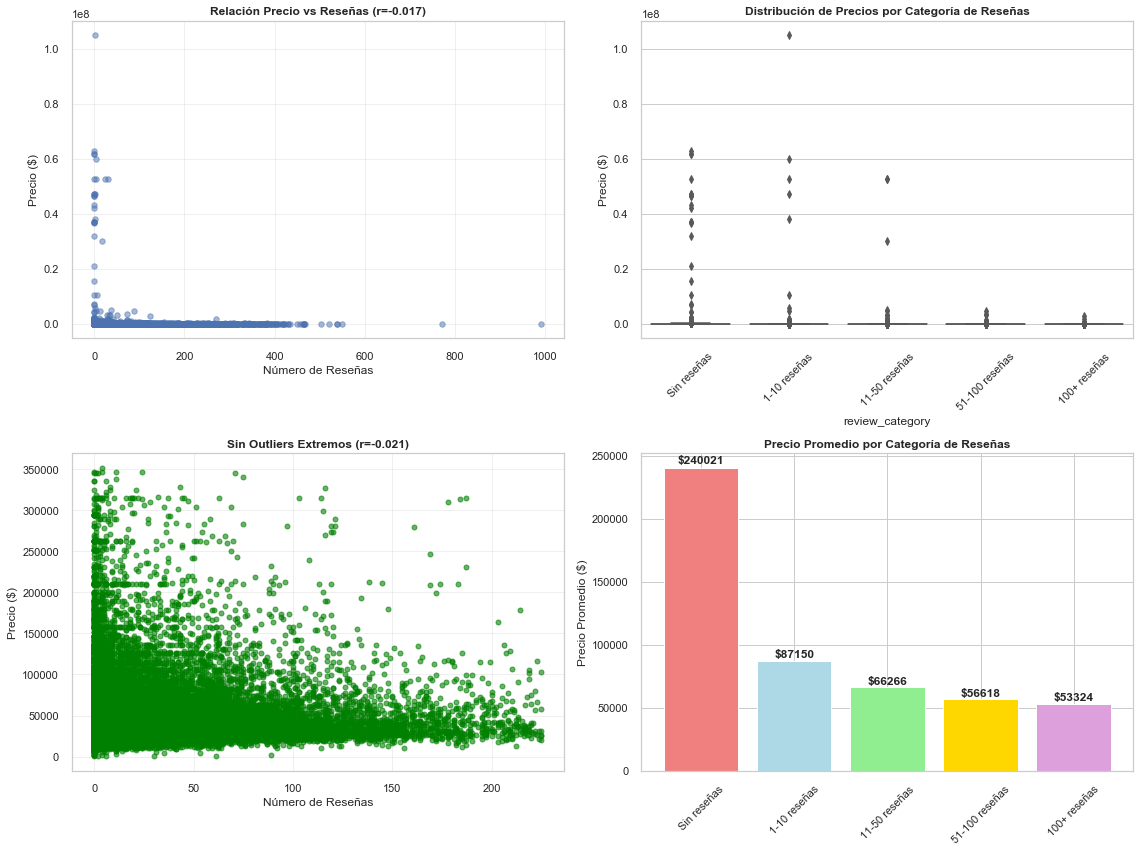

In [136]:

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.scatter(review_price['number_of_reviews'].values, review_price['price'].values, alpha=0.5, s=30)
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio ($)')
plt.title(f'Relación Precio vs Reseñas (r={correlation:.3f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
sns.boxplot(data=review_price, x='review_category', y='price', palette='Set2')
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Categoría de Reseñas', fontweight='bold')
plt.ylabel('Precio ($)')

plt.subplot(2, 2, 3)
q99_price = review_price['price'].quantile(0.99)
q99_reviews = review_price['number_of_reviews'].quantile(0.99)
filtered_data = review_price[
    (review_price['price'] <= q99_price) & 
    (review_price['number_of_reviews'] <= q99_reviews)
]

filtered_correlation = filtered_data['price'].corr(filtered_data['number_of_reviews'])

plt.scatter(filtered_data['number_of_reviews'].values, filtered_data['price'].values, 
           alpha=0.6, color='green', s=25)
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio ($)')
plt.title(f'Sin Outliers Extremos (r={filtered_correlation:.3f})', fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
avg_prices = price_by_reviews['mean']
colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold', 'plum']
bars = plt.bar(range(len(avg_prices)), avg_prices.values, color=colors)

for i, (bar, value) in enumerate(zip(bars, avg_prices.values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + value*0.01, 
             f'${value:.0f}', ha='center', va='bottom', fontweight='bold')

plt.xticks(range(len(avg_prices)), avg_prices.index.tolist(), rotation=45)
plt.title('Precio Promedio por Categoría de Reseñas', fontweight='bold')
plt.ylabel('Precio Promedio ($)')

plt.tight_layout()
plt.show()



In [137]:
# Información adicional
print(f"\n ANÁLISIS DETALLADO:")
print(f"Correlación completa: {correlation:.4f}")
print(f"Correlación sin outliers: {filtered_correlation:.4f}")
print(f"Total de propiedades analizadas: {len(review_price):,}")
print(f"Propiedades sin outliers: {len(filtered_data):,}")

print(f"\n INSIGHTS POR CATEGORÍA:")
for category in price_by_reviews.index:
    mean_price = price_by_reviews.loc[category, 'mean']
    count = price_by_reviews.loc[category, 'count']
    median_price = price_by_reviews.loc[category, 'median']
    print(f"{category}:")
    print(f"  • Precio promedio: ${mean_price:.2f}")
    print(f"  • Precio mediano: ${median_price:.2f}")
    print(f"  • Cantidad de listados: {count:,}")
    print(f"  • Porcentaje del total: {(count/len(review_price)*100):.1f}%")


 ANÁLISIS DETALLADO:
Correlación completa: -0.0168
Correlación sin outliers: -0.0206
Total de propiedades analizadas: 31,598
Propiedades sin outliers: 30,968

 INSIGHTS POR CATEGORÍA:
Sin reseñas:
  • Precio promedio: $240021.19
  • Precio mediano: $42009.00
  • Cantidad de listados: 4,445
  • Porcentaje del total: 14.1%
1-10 reseñas:
  • Precio promedio: $87150.47
  • Precio mediano: $40958.00
  • Cantidad de listados: 10,280
  • Porcentaje del total: 32.5%
11-50 reseñas:
  • Precio promedio: $66266.30
  • Precio mediano: $38259.00
  • Cantidad de listados: 10,964
  • Porcentaje del total: 34.7%
51-100 reseñas:
  • Precio promedio: $56617.69
  • Precio mediano: $38967.50
  • Cantidad de listados: 3,882
  • Porcentaje del total: 12.3%
100+ reseñas:
  • Precio promedio: $53324.05
  • Precio mediano: $39310.00
  • Cantidad de listados: 2,027
  • Porcentaje del total: 6.4%


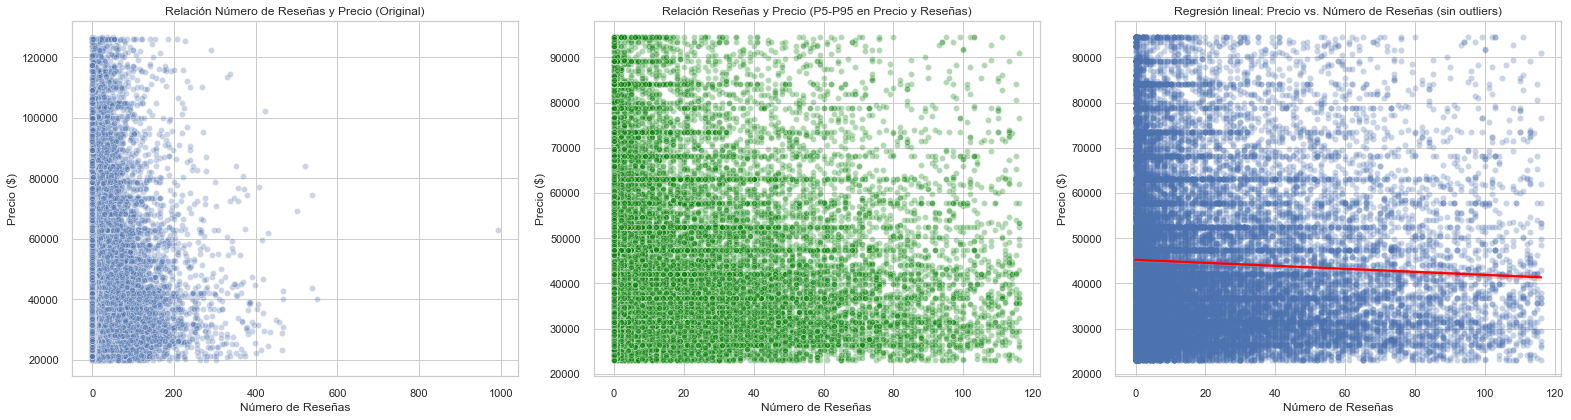

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns


p5_price, p95_price = price_neighbourhood['price'].quantile([0.05, 0.95])
p5_reviews, p95_reviews = price_neighbourhood['number_of_reviews'].quantile([0.05, 0.95])

# Filtrar por precio (P5-P95)
filtered_price = price_neighbourhood[
    (price_neighbourhood['price'] >= p5_price) & (price_neighbourhood['price'] <= p95_price)
]

# Filtrar por precio y número de reseñas (P5-P95)
filtered_price_reviews = price_neighbourhood[
    (price_neighbourhood['price'] >= p5_price) & (price_neighbourhood['price'] <= p95_price) &
    (price_neighbourhood['number_of_reviews'] >= p5_reviews) & (price_neighbourhood['number_of_reviews'] <= p95_reviews)
]

fig, axs = plt.subplots(1, 3, figsize=(22, 6))


sns.scatterplot(data=price_neighbourhood, x='number_of_reviews', y='price', alpha=0.3, ax=axs[0])
axs[0].set_title('Relación Número de Reseñas y Precio (Original)')
axs[0].set_xlabel('Número de Reseñas')
axs[0].set_ylabel('Precio ($)')


sns.scatterplot(data=filtered_price_reviews, x='number_of_reviews', y='price', alpha=0.3, ax=axs[1], color='green')
axs[1].set_title('Relación Reseñas y Precio (P5-P95 en Precio y Reseñas)')
axs[1].set_xlabel('Número de Reseñas')
axs[1].set_ylabel('Precio ($)')


sns.regplot(data=filtered_price_reviews, x='number_of_reviews', y='price', scatter_kws={'alpha':0.3}, ax=axs[2], line_kws={'color': 'red'})
axs[2].set_title('Regresión lineal: Precio vs. Número de Reseñas (sin outliers)')
axs[2].set_xlabel('Número de Reseñas')
axs[2].set_ylabel('Precio ($)')

plt.tight_layout()
plt.show()


In [141]:

price_median_by_neighbourhood = price_neighbourhood.groupby('neighbourhood')['price'].median().reset_index()
price_median_by_neighbourhood.columns = ['neighbourhood', 'median_price']


price_median_by_neighbourhood['price_category'] = pd.qcut(
    price_median_by_neighbourhood['median_price'], 
    q=3, 
    labels=['Bajo', 'Mediano', 'Alto']
)


reviews_by_neighbourhood = price_neighbourhood.groupby('neighbourhood')['number_of_reviews'].agg(['mean', 'median', 'count']).reset_index()


reviews_by_neighbourhood = reviews_by_neighbourhood.merge(price_median_by_neighbourhood, on='neighbourhood')


top_15_reviews = reviews_by_neighbourhood.sort_values('mean', ascending=False).head(15)


chart = alt.Chart(top_15_reviews).mark_bar(
    stroke='black',
    strokeWidth=1
).encode(
    x=alt.X('mean:Q', 
            title='Promedio de Reseñas',
            scale=alt.Scale(nice=True)),
    y=alt.Y('neighbourhood:N', 
            title='Barrio',
            sort=alt.SortField(field='mean', order='descending')),
    color=alt.Color('price_category:N',
                    scale=alt.Scale(
                        domain=['Bajo', 'Mediano', 'Alto'],
                        range=['#2ca02c', '#ffbf00', '#d62728']
                    ),
                    legend=alt.Legend(title="Categoría de Precio")),
    tooltip=[
        alt.Tooltip('neighbourhood:N', title='Barrio'),
        alt.Tooltip('mean:Q', title='Promedio de Reseñas', format='.2f'),
        alt.Tooltip('median:Q', title='Mediana de Reseñas', format='.2f'),
        alt.Tooltip('count:Q', title='Cantidad de Listados'),
        alt.Tooltip('median_price:Q', title='Mediana de Precio', format='.2f'),
        alt.Tooltip('price_category:N', title='Categoría de Precio')
    ]
).properties(
    width=600,
    height=400,
    title=alt.TitleParams(
        text='Top 15 Barrios con Mayor Promedio de Reseñas por Alojamiento',
        fontSize=16,
        fontWeight='bold',
        anchor='start'
    )
).configure_axis(
    labelFontSize=11,
    titleFontSize=12
).configure_title(
    fontSize=14,
    fontWeight='bold'
)

chart


alt.Chart(...)

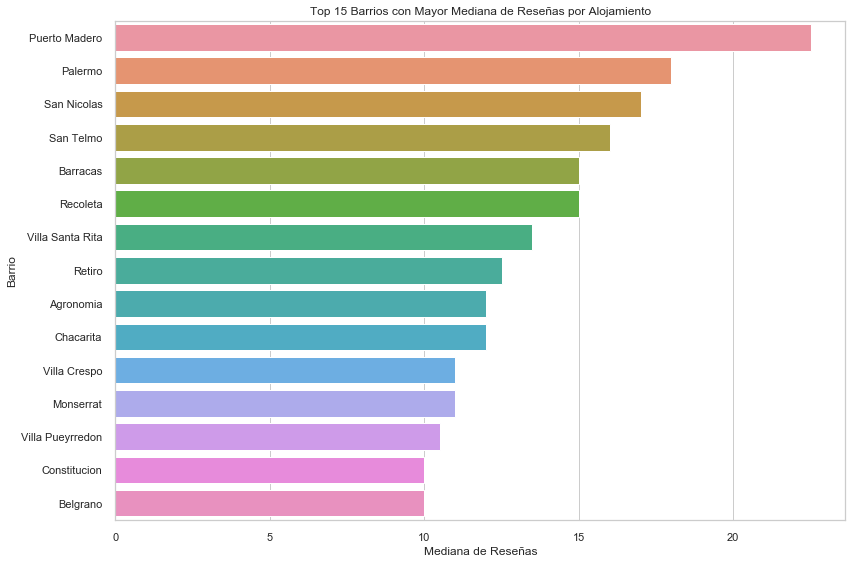

In [142]:



reviews_by_neighbourhood = price_neighbourhood.groupby('neighbourhood')['number_of_reviews'].agg(['mean', 'median', 'count']).reset_index()
reviews_by_neighbourhood = reviews_by_neighbourhood.sort_values('median', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=reviews_by_neighbourhood.head(15), y='neighbourhood', x='median')
plt.title('Top 15 Barrios con Mayor Mediana de Reseñas por Alojamiento')
plt.xlabel('Mediana de Reseñas')
plt.ylabel('Barrio')
plt.tight_layout()
plt.show()



In [144]:

price_median_by_neighbourhood = price_neighbourhood.groupby('neighbourhood')['price'].median().reset_index()
price_median_by_neighbourhood.columns = ['neighbourhood', 'median_price']

price_median_by_neighbourhood['price_category'] = pd.qcut(
    price_median_by_neighbourhood['median_price'],
    q=3,
    labels=['Bajo', 'Mediano', 'Alto']
)

review_stats = price_neighbourhood.groupby('neighbourhood')[['number_of_reviews', 'number_of_reviews_ltm']].sum().reset_index()
review_stats = review_stats[review_stats['number_of_reviews'] > 0].copy()
review_stats['renewal_rate'] = review_stats['number_of_reviews_ltm'] / review_stats['number_of_reviews']

review_stats = review_stats.merge(price_median_by_neighbourhood, on='neighbourhood')

top_renewing = review_stats.sort_values('renewal_rate', ascending=False).head(15)

chart = alt.Chart(top_renewing).mark_bar(
    stroke='black',
    strokeWidth=1
).encode(
    x=alt.X('renewal_rate:Q', title='Tasa de Renovación (último año / total)', scale=alt.Scale(domain=[0, 1])),
    y=alt.Y('neighbourhood:N', title='Barrio', sort=alt.SortField(field='renewal_rate', order='descending')),
    color=alt.Color('price_category:N',
                    scale=alt.Scale(
                        domain=['Bajo', 'Mediano', 'Alto'],
                        range=['#2ca02c', '#ffbf00', '#d62728']
                    ),
                    legend=alt.Legend(title='Categoría de Precio')),
    tooltip=[
        alt.Tooltip('neighbourhood:N', title='Barrio'),
        alt.Tooltip('renewal_rate:Q', title='Tasa de Renovación', format='.2f'),
        alt.Tooltip('number_of_reviews_ltm:Q', title='Reviews Último Año'),
        alt.Tooltip('number_of_reviews:Q', title='Reviews Totales'),
        alt.Tooltip('median_price:Q', title='Mediana Precio', format='.0f'),
        alt.Tooltip('price_category:N', title='Categoría Precio')
    ]
).properties(
    width=650,
    height=400,
    title='Top 15 Barrios con Mayor Tasa de Renovación de Reseñas'
).configure_axis(
    labelFontSize=11,
    titleFontSize=12
).configure_title(
    fontSize=14,
    fontWeight='bold'
)

chart


alt.Chart(...)

In [146]:

price_median_by_neighbourhood = price_neighbourhood.groupby('neighbourhood')['price'].median().reset_index()
price_median_by_neighbourhood.columns = ['neighbourhood', 'median_price']

price_median_by_neighbourhood['price_category'] = pd.qcut(
    price_median_by_neighbourhood['median_price'],
    q=3,
    labels=['Bajo', 'Mediano', 'Alto']
)

review_stats = price_neighbourhood.groupby('neighbourhood')[['number_of_reviews', 'number_of_reviews_ltm']].sum().reset_index()
review_stats = review_stats[review_stats['number_of_reviews'] > 0].copy()
review_stats['renewal_rate'] = review_stats['number_of_reviews_ltm'] / review_stats['number_of_reviews']

review_stats = review_stats.merge(price_median_by_neighbourhood, on='neighbourhood')

filtered_stats = review_stats[review_stats['number_of_reviews'] >= 10].copy()

scatter_chart = alt.Chart(filtered_stats).mark_circle(
    size=100,
    stroke='white',
    strokeWidth=1
).encode(
    x=alt.X('median_price:Q', 
            title='Precio Mediano por Barrio ($)',
            scale=alt.Scale(nice=True)),
    y=alt.Y('renewal_rate:Q', 
            title='Tasa de Renovación de Reseñas',
            scale=alt.Scale(domain=[0, 1])),
    color=alt.Color('price_category:N',
                    scale=alt.Scale(
                        domain=['Bajo', 'Mediano', 'Alto'],
                        range=['#2ca02c', '#ffbf00', '#d62728']
                    ),
                    legend=alt.Legend(title='Categoría de Precio')),
    size=alt.Size('number_of_reviews:Q',
                  scale=alt.Scale(range=[50, 400]),
                  legend=alt.Legend(title='Total de Reseñas')),
    tooltip=[
        alt.Tooltip('neighbourhood:N', title='🏘️ Barrio'),
        alt.Tooltip('median_price:Q', title='💰 Precio Mediano', format='$.0f'),
        alt.Tooltip('renewal_rate:Q', title='📊 Tasa de Renovación', format='.2f'),
        alt.Tooltip('number_of_reviews_ltm:Q', title='📈 Reviews Último Año'),
        alt.Tooltip('number_of_reviews:Q', title='📝 Reviews Totales'),
        alt.Tooltip('price_category:N', title='🏷️ Categoría Precio')
    ]
).properties(
    width=700,
    height=500,
    title=alt.TitleParams(
        text='Relación entre Precio y Tasa de Renovación de Reseñas por Barrio',
        subtitle='El tamaño del punto representa el total de reseñas',
        fontSize=16,
        fontWeight='bold',
        anchor='start'
    )
).configure_axis(
    labelFontSize=11,
    titleFontSize=12,
    grid=True,
    gridOpacity=0.3
).configure_title(
    fontSize=14,
    fontWeight='bold'
)

# Mostrar el gráfico
scatter_chart

alt.Chart(...)

3. Cuál es la relación entre disponibilidad y precio?

In [147]:
avail_price = df_clean.dropna(subset=['availability_365', 'price'])
avail_price = avail_price[avail_price['price'] > 0]


correlation = avail_price['availability_365'].corr(avail_price['price'])
print(f"\nCorrelación entre disponibilidad y precio: {correlation:.3f}")


avail_price['availability_category'] = pd.cut(
    avail_price['availability_365'],
    bins=[0, 90, 180, 270, 365],
    labels=['Baja (0-90)', 'Media (91-180)', 'Alta (181-270)', 'Muy Alta (271-365)']
)

avail_stats = avail_price.groupby('availability_category')['price'].agg([
    'mean', 'median', 'count'
]).round(2)

print("\n Precio promedio por nivel de disponibilidad:")
print(avail_stats)

print("\n INSIGHTS ADICIONALES:")
always_available = avail_price[avail_price['availability_365'] == 365]
never_available = avail_price[avail_price['availability_365'] == 0]

print(f"Listados disponibles todo el año: {len(always_available)} ({len(always_available)/len(avail_price)*100:.1f}%)")
print(f"Listados no disponibles: {len(never_available)} ({len(never_available)/len(avail_price)*100:.1f}%)")


print(f"Precio promedio (disponibles todo el año): ${always_available['price'].mean():.2f}")


Correlación entre disponibilidad y precio: -0.007

 Precio promedio por nivel de disponibilidad:
                            mean   median  count
availability_category                           
Baja (0-90)            134079.56  36758.0   6400
Media (91-180)          60534.03  37808.0   5829
Alta (181-270)         114939.27  40360.0   6345
Muy Alta (271-365)      83117.61  42009.0  12801

 INSIGHTS ADICIONALES:
Listados disponibles todo el año: 1667 (5.3%)
Listados no disponibles: 223 (0.7%)
Precio promedio (disponibles todo el año): $136687.73


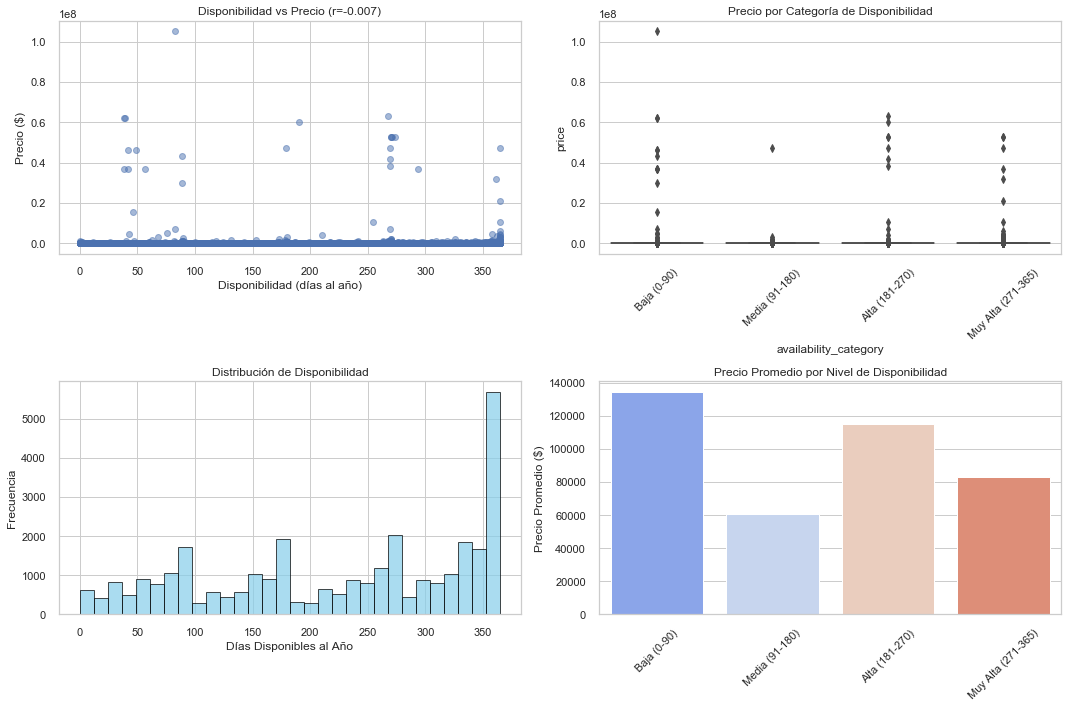

In [148]:

plt.figure(figsize=(15, 10))


plt.subplot(2, 2, 1)
plt.scatter(avail_price['availability_365'].values, avail_price['price'].values, alpha=0.5)
plt.xlabel('Disponibilidad (días al año)')
plt.ylabel('Precio ($)')
plt.title(f'Disponibilidad vs Precio (r={correlation:.3f})')


plt.subplot(2, 2, 2)
sns.boxplot(data=avail_price, x='availability_category', y='price')
plt.xticks(rotation=45)
plt.title('Precio por Categoría de Disponibilidad')


plt.subplot(2, 2, 3)
plt.hist(avail_price['availability_365'].values, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Días Disponibles al Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de Disponibilidad')


plt.subplot(2, 2, 4)
avg_prices = avail_stats['mean']

sns.barplot(x=avg_prices.index.tolist(), y=avg_prices.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Precio Promedio por Nivel de Disponibilidad')
plt.ylabel('Precio Promedio ($)')

plt.tight_layout()
plt.show()

In [149]:

avail_stats_reset = avail_stats.reset_index()
avail_stats_reset['percentage'] = (avail_stats_reset['count'] / avail_stats_reset['count'].sum() * 100).round(1)
avail_stats_reset['houses_needed'] = avail_stats_reset['percentage'].round().astype(int)

isotype_data = []
house_id = 0

for _, row in avail_stats_reset.iterrows():
    category = row['availability_category']
    houses = int(row['houses_needed'])
    count = row['count']
    percentage = row['percentage']
    price_avg = row['mean']
    
    for i in range(houses):
        col = house_id % 10
        row_pos = house_id // 10
        isotype_data.append({
            'x': col,
            'y': row_pos,
            'category': category,
            'count': count,
            'percentage': percentage,
            'price_avg': price_avg,
            'house_id': house_id,
        })
        house_id += 1

isotype_df = pd.DataFrame(isotype_data)



In [151]:
isotype_data = []

emoji_mapping = {
    'Baja (0-90)': '🔥',
    'Media (91-180)': '🏡', 
    'Alta (181-270)': '🏢',
    'Muy Alta (271-365)': '🏘️'
}

# Crear etiquetas que incluyan los emojis
isotype_df['emoji'] = isotype_df['category'].map(emoji_mapping)
isotype_df['category_with_emoji'] = isotype_df['emoji'] + ' ' + isotype_df['category']

house_chart = alt.Chart(isotype_df).mark_text(
    fontSize=25,
    baseline='middle',
    align='center'
).encode(
    x=alt.X('x:O', axis=None),
    y=alt.Y('y:O', axis=None, sort='descending'),
    text='emoji:N',
    color=alt.Color('category_with_emoji:N',
                    scale=alt.Scale(
                        domain=['🔥 Baja (0-90)', '🏡 Media (91-180)', '🏢 Alta (181-270)', '🏘️ Muy Alta (271-365)'],
                        range=['#e74c3c', '#f39c12', '#f1c40f', '#27ae60']
                    ),
                    legend=alt.Legend(
                        title="🏠 Nivel de Disponibilidad",
                        orient="bottom",
                        columns=2,
                        titleFontSize=14,
                        labelFontSize=12,
                        symbolSize=100
                    )),
    tooltip=[
        alt.Tooltip('category:N', title='🏠 Disponibilidad'),
        alt.Tooltip('count:Q', title='📊 Propiedades', format=','),
        alt.Tooltip('percentage:Q', title='📈 Porcentaje', format='.1f'),
        alt.Tooltip('price_avg:Q', title='💰 Precio Promedio', format='$.0f')
    ]
).properties(
    width=500,
    height=300,
    title=alt.TitleParams(
        text=[
            '🏘️ Distribución de Disponibilidad - Airbnb Buenos Aires',
            f'Cada casa = ~1% del total | Total: {avail_stats_reset["count"].sum():,} propiedades'
        ],
        fontSize=16,
        fontWeight='bold',
        anchor='middle',
        subtitleFontSize=12,
        subtitleColor='#666666'
    )
).configure_view(strokeWidth=0)

house_chart

alt.Chart(...)